<a href="https://colab.research.google.com/github/lamontdobbins3-stack/DataScience/blob/main/Airline_Feedback_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Data Processing: In Aviation ✈️!
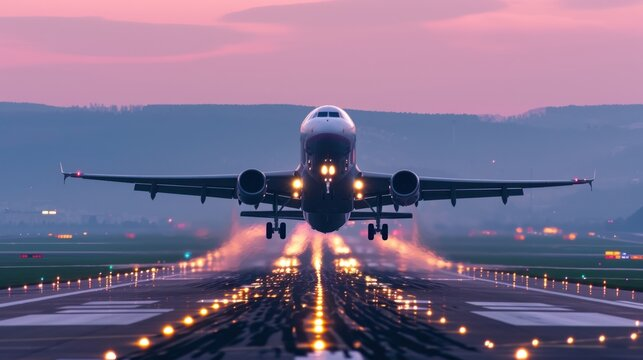

Here is an exploration of an airline feedback [dataset](https://www.kaggle.com/datasets/chaudharyanshul/airline-reviews?resource=download) given post flight in the form of a survey. The airline collection customer sentimnet on their overall experiance and a variety of offerings within the flyers travel experiance. This is a great dataset that could (and will) be used for Natural Language Processing (NLP) later on. See other posts in the repo to learn about all the steps necessary to doing consumer intelligence research!

For now, I will just go through the dataset and answer some questions about my findings!

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from collections import Counter
import warnings
from datasets import load_dataset
import kagglehub
from kagglehub import KaggleDatasetAdapter

### Environment Set Up

In [ ]:
#Set Up Env
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 100)

print("Libraries imported!")
print(f"   Pandas version: {pd.__version__}")
print(f"   NumPy version: {np.__version__}")

Libraries imported!
   Pandas version: 2.2.2
   NumPy version: 2.0.2


### Loading the Dataset

In [ ]:
#Load Data
# Set the path to the file in the dataset
file_path = "BA_AirlineReviews.csv"

# Load the latest version
dataset = kagglehub.load_dataset(
  KaggleDatasetAdapter.HUGGING_FACE,
  "chaudharyanshul/airline-reviews",
  file_path,
)

print("Hugging Face Dataset:", dataset)

df = dataset.to_pandas()

100%|██████████| 1.30M/1.30M [00:00<00:00, 1.84MB/s]

Extracting zip of BA_AirlineReviews.csv...


Hugging Face Dataset: Dataset({
    features: ['Unnamed: 0', 'OverallRating', 'ReviewHeader', 'Name', 'Datetime', 'VerifiedReview', 'ReviewBody', 'TypeOfTraveller', 'SeatType', 'Route', 'DateFlown', 'SeatComfort', 'CabinStaffService', 'GroundService', 'ValueForMoney', 'Recommended', 'Aircraft', 'Food&Beverages', 'InflightEntertainment', 'Wifi&Connectivity'],
    num_rows: 3701
})


### Clean Dataset

In [ ]:
# Basic info about your dataset
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"Number of rows: {len(df):,}")
print(f"Number of columns: {len(df.columns)}")
print(f"\nColumn names: {list(df.columns)}")
print(f"\nData types:")
print(df.dtypes)

df.head()

DATASET OVERVIEW
Number of rows: 3,701
Number of columns: 20

Column names: ['Unnamed: 0', 'OverallRating', 'ReviewHeader', 'Name', 'Datetime', 'VerifiedReview', 'ReviewBody', 'TypeOfTraveller', 'SeatType', 'Route', 'DateFlown', 'SeatComfort', 'CabinStaffService', 'GroundService', 'ValueForMoney', 'Recommended', 'Aircraft', 'Food&Beverages', 'InflightEntertainment', 'Wifi&Connectivity']

Data types:
Unnamed: 0                 int64
OverallRating            float64
ReviewHeader              object
Name                      object
Datetime                  object
VerifiedReview              bool
ReviewBody                object
TypeOfTraveller           object
SeatType                  object
Route                     object
DateFlown                 object
SeatComfort              float64
CabinStaffService        float64
GroundService            float64
ValueForMoney            float64
Recommended               object
Aircraft                  object
Food&Beverages           float64
Inf

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stating a cryptic message that there are disruptions t...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,None,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from BRU to LHR that was due to staff shortages. They ...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to the runway due to congestion. Flight was smooth and ...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by BA that it had been cancelled and asked us to reboo...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,None,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, a cruise to Portugal and Spain. Our friends did no...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,None,1.0,1.0,1.0


In [ ]:
# Check for missing values
print("=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)

missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing Count': missing.values,
    'Missing %': missing_pct.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing %', ascending=False)

if len(missing_df) > 0:
    print("\n⚠️ Columns with missing values:")
    print(missing_df.to_string(index=False))
else:
    print("\n✅ No missing values found!")

print(f"\nTotal cells: {df.size:,}")
print(f"Missing cells: {df.isnull().sum().sum():,}")
print(f"Completeness: {(1 - df.isnull().sum().sum() / df.size) * 100:.2f}%")

MISSING VALUES ANALYSIS

⚠️ Columns with missing values:
               Column  Missing Count  Missing %
    Wifi&Connectivity           3092      83.54
             Aircraft           1779      48.07
InflightEntertainment           1150      31.07
        GroundService            846      22.86
            DateFlown            778      21.02
                Route            775      20.94
      TypeOfTraveller            771      20.83
       Food&Beverages            386      10.43
    CabinStaffService            127       3.43
          SeatComfort            116       3.13
        OverallRating              5       0.14
             SeatType              2       0.05
        ValueForMoney              1       0.03

Total cells: 74,020
Missing cells: 9,828
Completeness: 86.72%


In [ ]:
# Check for duplicate rows
print("=" * 60)
print("DUPLICATE RECORDS ANALYSIS")
print("=" * 60)

duplicates = df.duplicated().sum()
duplicate_pct = (duplicates / len(df) * 100)

print(f"\nTotal rows: {len(df):,}")
print(f"Duplicate rows: {duplicates:,}")
print(f"Duplicate percentage: {duplicate_pct:.2f}%")

if duplicates > 0:
    print("\n⚠️ Sample duplicate rows:")
    print(df[df.duplicated(keep=False)].head())
else:
    print("\n✅ No duplicate rows found!")

DUPLICATE RECORDS ANALYSIS

Total rows: 3,701
Duplicate rows: 0
Duplicate percentage: 0.00%

✅ No duplicate rows found!


In [ ]:
# Identify numeric columns and check for outliers
print("=" * 60)
print("OUTLIER ANALYSIS (Numeric Columns)")
print("=" * 60)

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumeric columns found: {numeric_cols}")

if len(numeric_cols) > 0:
    for col in numeric_cols[:5]:  # Limit to first 5 numeric columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_pct = len(outliers) / len(df) * 100

        print(f"\n📊 {col}:")
        print(f"   Range: {df[col].min():.2f} to {df[col].max():.2f}")
        print(f"   Mean: {df[col].mean():.2f}, Median: {df[col].median():.2f}")
        print(f"   Outliers: {len(outliers):,} ({outlier_pct:.1f}%)")
else:
    print("\nNo numeric columns found for outlier analysis.")

OUTLIER ANALYSIS (Numeric Columns)

Numeric columns found: ['Unnamed: 0', 'OverallRating', 'SeatComfort', 'CabinStaffService', 'GroundService', 'ValueForMoney', 'Food&Beverages', 'InflightEntertainment', 'Wifi&Connectivity']

📊 Unnamed: 0:
   Range: 0.00 to 3700.00
   Mean: 1850.00, Median: 1850.00
   Outliers: 0 (0.0%)

📊 OverallRating:
   Range: 1.00 to 10.00
   Mean: 4.73, Median: 4.00
   Outliers: 0 (0.0%)

📊 SeatComfort:
   Range: 1.00 to 5.00
   Mean: 2.88, Median: 3.00
   Outliers: 0 (0.0%)

📊 CabinStaffService:
   Range: 1.00 to 5.00
   Mean: 3.25, Median: 3.00
   Outliers: 0 (0.0%)

📊 GroundService:
   Range: 1.00 to 5.00
   Mean: 2.78, Median: 3.00
   Outliers: 0 (0.0%)


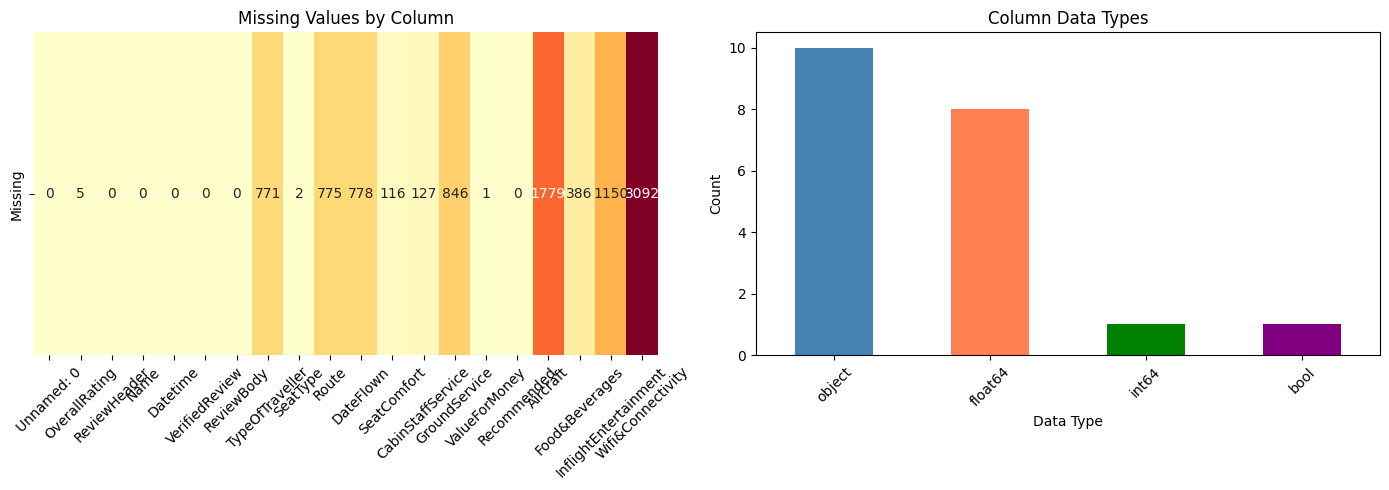


✅ Data Quality Assessment Complete!


In [ ]:
# Create a visual summary
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Missing values heatmap
ax1 = axes[0]
missing_matrix = df.isnull().sum().values.reshape(1, -1)
sns.heatmap(missing_matrix, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=df.columns, yticklabels=['Missing'], ax=ax1, cbar=False)
ax1.set_title('Missing Values by Column', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

#distribution
ax2 = axes[1]
dtype_counts = df.dtypes.astype(str).value_counts()
dtype_counts.plot(kind='bar', ax=ax2, color=['steelblue', 'coral', 'green', 'purple'][:len(dtype_counts)])
ax2.set_title('Column Data Types', fontsize=12)
ax2.set_xlabel('Data Type')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n✅ Data Quality Assessment Complete!")

###Handling Null Values

Since some key features are missing large values of data, I will clean the nulls using two methods. First, since Wifi & Connectviity offering is heavily related to flight duration, it may not always be offered and therefore null by design. Considering the average person is not an aviation geek, they also may not know their aircraft type. We can flag both of these values as missing.
<br>

First, for the features under 10% of missing values, I will simply just remove as the volume of null records is marginal. This includes features such as 'SeatComfort' and 'CabinStaffService'.
<br>

Secondly, for features with larger amounts of missing data (such as 'GroundService' and 'Food and Beverages'), I will use the median value.
<br>

All other non correlated features such as Route and DateFlown will be dropped in the initial segment of this EDA as they may not provide immediate value (route is definately possible but will be ignored for this initial first step).

In [ ]:
#remove null rows from SeatComfort and CabinStaffService

df_cleaned = df.dropna(subset=["SeatComfort","CabinStaffService"])
print(f"Original rows: {len(df)}")
print(f"Rows after removing nulls: {len(df_cleaned)}")

Original rows: 3701
Rows after removing nulls: 3574


In [ ]:
#impute remaining nulls with the median value
impute_features = ["Food&Beverages","GroundService"]

for f in impute_features:
  df_cleaned[f + "_missing"] = df_cleaned[f].isna().astype(int)

for f in impute_features:
  median_value = df_cleaned[f].median()
  df_cleaned[f] = df_cleaned[f].fillna(median_value)
  print(f"Imputed {f} with median: {median_value}")

  print("Remaining Null Values:")
  print(df_cleaned.isnull().sum())


Imputed Food&Beverages with median: 3.0
Remaoinig Null Values:
Unnamed: 0                   0
OverallRating                5
ReviewHeader                 0
Name                         0
Datetime                     0
VerifiedReview               0
ReviewBody                   0
TypeOfTraveller            769
SeatType                     2
Route                      772
DateFlown                  777
SeatComfort                  0
CabinStaffService            0
GroundService              780
ValueForMoney                1
Recommended                  0
Aircraft                  1665
Food&Beverages               0
InflightEntertainment     1023
Wifi&Connectivity         2965
Food&Beverages_missing       0
GroundService_missing        0
dtype: int64
Imputed GroundService with median: 3.0
Remaoinig Null Values:
Unnamed: 0                   0
OverallRating                5
ReviewHeader                 0
Name                         0
Datetime                     0
VerifiedReview           

### Explore

In [ ]:
#EDA Libraries
from scipy.stats import pearsonr

#Find key relationships (all)
score_df = df.drop(columns=['Unnamed: 0','ReviewHeader',	'Name',	'Datetime',	'VerifiedReview',	'ReviewBody',	'TypeOfTraveller',	'SeatType',	'Route',	'DateFlown', 'Recommended',	'Aircraft'])

#Split data
X = score_df.drop(columns=['OverallRating'])
y = score_df['OverallRating']

#Assess Columns
results = []

for col in X.columns:
    #Drop NA pairwise for each feature
    mask = ~(X[col].isna() | y.isna())
    if mask.sum() < 3:
        corr, pval = np.nan, np.nan
    else:
        corr, pval = pearsonr(X[col][mask], y[mask])

    results.append({
        "feature": col,
        "pearson_r": corr,
        "p_value": pval
    })

corr_df = pd.DataFrame(results)

#Sort strongest absolute correlations
corr_df["abs_r"] = corr_df["pearson_r"].abs()
corr_df = corr_df.sort_values("abs_r", ascending=False)

print(corr_df[["feature", "pearson_r", "p_value"]])

                  feature  pearson_r        p_value
3           ValueForMoney   0.873133   0.000000e+00
4          Food&Beverages   0.760443   0.000000e+00
0             SeatComfort   0.739603   0.000000e+00
2           GroundService   0.729246   0.000000e+00
1       CabinStaffService   0.722875   0.000000e+00
6       Wifi&Connectivity   0.609063   4.202917e-63
5   InflightEntertainment   0.546710  1.992166e-198
7  Food&Beverages_missing  -0.253420   2.945214e-55
8   GroundService_missing   0.152950   8.727622e-21


In [ ]:
#split by seat type (economy vs business vs first)
economy_df = df[df['SeatType'] == 'Economy Class']
business_df = df[df['SeatType'] == 'Business Class']

                  feature  pearson_r        p_value
3           ValueForMoney   0.859873   0.000000e+00
2           GroundService   0.747342  1.339776e-276
0             SeatComfort   0.729193  1.271393e-305
4          Food&Beverages   0.729084  9.791963e-269
1       CabinStaffService   0.712888  1.224746e-284
6       Wifi&Connectivity   0.566263   1.343039e-27
5   InflightEntertainment   0.458590   1.121981e-62
7  Food&Beverages_missing  -0.249912   8.765731e-29
8   GroundService_missing   0.150580   3.167700e-11


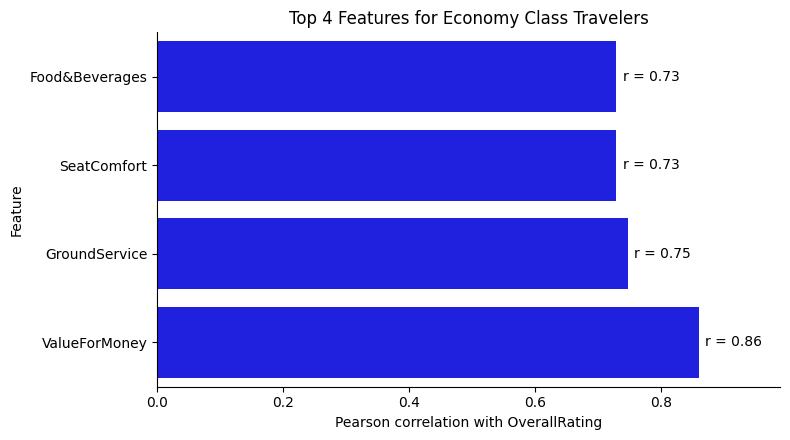

In [ ]:
#Strongest factors for Economy Travelers
economy_scores = economy_df.drop(columns=['Unnamed: 0','ReviewHeader',	'Name',	'Datetime',	'VerifiedReview',	'ReviewBody',	'TypeOfTraveller',	'SeatType',	'Route',	'DateFlown', 'Recommended',	'Aircraft'])

#split columns
X = economy_scores.drop(columns=['OverallRating'])
y = economy_scores['OverallRating']

#Assess Columns
results = []

for col in X.columns:
    #Drop NA pairwise for each feature
    mask = ~(X[col].isna() | y.isna())
    if mask.sum() < 3:
        corr, pval = np.nan, np.nan
    else:
        corr, pval = pearsonr(X[col][mask], y[mask])

    results.append({
        "feature": col,
        "pearson_r": corr,
        "p_value": pval
    })

corr_df = pd.DataFrame(results)

#Sort strongest absolute correlations
corr_df["abs_r"] = corr_df["pearson_r"].abs()
corr_df = corr_df.sort_values("abs_r", ascending=False)

print(corr_df[["feature", "pearson_r", "p_value"]])

top4 = corr_df.dropna(subset=["abs_r"]).head(4).copy()

#Sort values
top4 = top4.sort_values("abs_r", ascending=True)  # ascending so the strongest is at the top of the horizontal bars

plt.figure(figsize=(8, 4.5))
ax = sns.barplot(
    data=top4,
    x="abs_r",
    y="feature",
    color="blue"
)

#Add labels
for i, (r, feat) in enumerate(zip(top4["pearson_r"], top4["feature"])):
    ax.text(
        x=abs(r) + 0.01, y=i,
        s=f"r = {r:.2f}",
        va="center"
    )

plt.title("Top 4 Features for Economy Class Travelers")
plt.xlabel("Pearson correlation with OverallRating")
plt.ylabel("Feature")
plt.xlim(0, top4["abs_r"].max() * 1.15)
sns.despine()
plt.tight_layout()
plt.show()



                  feature  pearson_r        p_value
3           ValueForMoney   0.887916   0.000000e+00
4          Food&Beverages   0.785550  1.824595e-239
0             SeatComfort   0.744903  7.145861e-208
1       CabinStaffService   0.719666  2.834389e-187
2           GroundService   0.686678  9.994447e-124
6       Wifi&Connectivity   0.670634   1.057524e-26
5   InflightEntertainment   0.579556   2.367749e-76
7  Food&Beverages_missing  -0.228743   1.126872e-15
8   GroundService_missing   0.129005   7.557767e-06


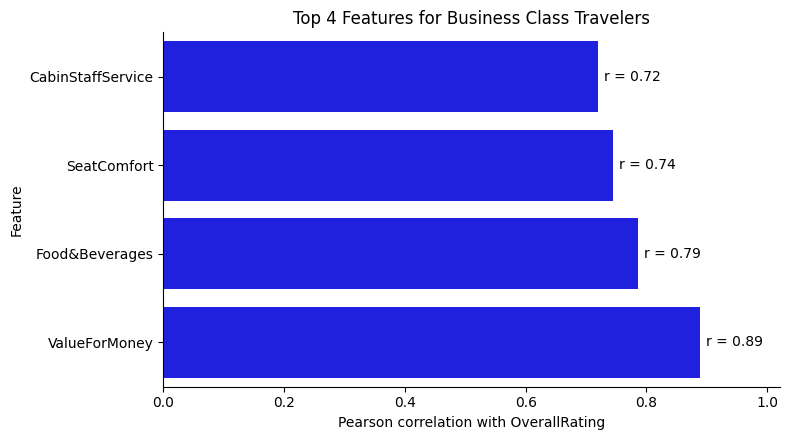

In [ ]:
#Strongest factors for Business Class Travelers
business_scores = business_df.drop(columns=['Unnamed: 0','ReviewHeader',	'Name',	'Datetime',	'VerifiedReview',	'ReviewBody',	'TypeOfTraveller',	'SeatType',	'Route',	'DateFlown', 'Recommended',	'Aircraft'])

#split data
X = business_scores.drop(columns=['OverallRating'])
y = business_scores['OverallRating']

#Assess Columns
results = []

for col in X.columns:
    #Drop NA pairwise for each feature
    mask = ~(X[col].isna() | y.isna())
    if mask.sum() < 3:
        corr, pval = np.nan, np.nan
    else:
        corr, pval = pearsonr(X[col][mask], y[mask])

    results.append({
        "feature": col,
        "pearson_r": corr,
        "p_value": pval
    })

corr_df = pd.DataFrame(results)

#Sort strongest absolute correlations
corr_df["abs_r"] = corr_df["pearson_r"].abs()
corr_df = corr_df.sort_values("abs_r", ascending=False)

print(corr_df[["feature", "pearson_r", "p_value"]])


top4 = corr_df.dropna(subset=["abs_r"]).head(4).copy()

#Sort values
top4 = top4.sort_values("abs_r", ascending=True)

plt.figure(figsize=(8, 4.5))
ax = sns.barplot(
    data=top4,
    x="abs_r",
    y="feature",
    color="blue"
)

#Add labels
for i, (r, feat) in enumerate(zip(top4["pearson_r"], top4["feature"])):
    ax.text(
        x=abs(r) + 0.01, y=i,
        s=f"r = {r:.2f}",
        va="center"
    )

plt.title("Top 4 Features for Business Class Travelers")
plt.xlabel("Pearson correlation with OverallRating")
plt.ylabel("Feature")
plt.xlim(0, top4["abs_r"].max() * 1.15)  # add a little headroom for the text
sns.despine()
plt.tight_layout()
plt.show()



**Q1.  Which data source did you use (Kaggle or HuggingFace)? Why did you choose it?**

I decided to chose a HuggingFace data source because I have utilized Kaggle in the past but have not used HuggingFace. I know that HuggingFace is a great resource for NLP which I want to further develop my skills in so I can work in a role that utilizes NLP tehcniques. I found that the library connection to HuggingFace was very simple too. I decided to choose my own dataset for this project so I can allign it closer to the industry I am in and challenge myself with a real world problem I may see one day.

<br>

**Q2. What did you learn from exploring your dataset with .describe() and .value_counts()?**

By using the methods above, we can get a nice overview of what our dataset contains. For example, using .value_counts() showed the counts of all the types of datatypes present in the dataset. This gives an early view of any transformations or mental notes for future manipulation we may need to perform on the dataset.


<br>

**Q3. What data quality issues did you find (missing values, duplicates, outliers)? How might these affect analysis?**

Some of the data quality issues I found were that there were quite a few featues with thousands of missing values. The largest one was "Wifi&Connectivity". This could be interpreted as not all flights having the option to utilize wifi especially on shorter domestic routes. The more important ones were "Food&Beverage" and "CabinStaffService". The null values here hurt our analysis as these features are present on every flight and also are important to understanding what is relavant in customer experience.

<br>

**Q4.What interesting pattern or insight did you discover in your data? Why is it interesting or surprising?**

In my exploratory data analysis, I decided to do some correlation analysis between the Overall Rating and the multiple quantatative survey questions to find which features are most important to customers and give ideas of how we can segment customers in the future for sentiment analysis. While doing so, the dataset had a specific feature called "SeatType" which splits flyers by Economy, Business and First Class customers. Business Class flyers hold different expectations and values when partaking on the travel experiance from those in Economy. I segmented both Business and Economy travelers to see which features correlated with a higher satisfaction score. One interesting pattern was that Business Class flyers prioritized an upgraded travel experiance with highest correlations on Food and Beverage, Seat Comfort, and Cabin Staff Service. In Economy, flyers focused more on the Ground Service they recieved at the airport, Food and Beverages, and Seat Comfort.


The distinct difference was where they recieve service. Higher paying customers expect quality service in the air while economy may have low expectations flying with an economy ticket, hence, they focus more on ground service. Airline companies can utilize this data to tweak processes in the overall experiance these type of travelers recieve to slightly increase their travel experiance and foster loyalty to the airline.

*Note - Copilot was used to help generate the skeleton code for the feature map loop in SciPi as well as adding features to my graph*